In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
term_life_insurance = pd.read_csv(r'C:\Users\Yeswanth Reddy\Downloads\dataset.csv')

In [58]:
term_life_insurance.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [59]:
term_life_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [69]:
numerical_features = term_life_insurance.select_dtypes(include=[np.number]).copy()

In [72]:
numerical_features

,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
3,47,5,92,1
4,33,5,198,1
...,...,...,...,...
45206,51,17,977,3
45207,71,17,456,2
45208,72,17,1127,5
45209,57,17,508,4


In [61]:
categorical_features = term_life_insurance.select_dtypes(include=['object', 'category']).columns
for feature in categorical_features:
    print(f"Value counts for {feature}:")
    print(term_life_insurance[feature].value_counts())
    print("\n")

Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


Value counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


Value counts for education_qual:
education_qual
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


Value counts for call_type:
call_type
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


Value counts for mon:
mon
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


Value counts for prev_outcome:
prev_outcome
unknown    36959
failure     4901
oth

In [77]:
from sklearn.preprocessing import LabelEncoder
# Create a copy of the dataframe to avoid altering the original
tls_label_encoded = term_life_insurance[['marital', 'education_qual', 'call_type', 'prev_outcome', 'y']].copy()

label_encoders = {}
for column in tls_label_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    tls_label_encoded[column] = le.fit_transform(tls_label_encoded[column])
    label_encoders[column] = le

print(tls_label_encoded.head())

   marital  education_qual  call_type  prev_outcome  y
0        1               2          2             3  0
1        2               1          2             3  0
2        1               1          2             3  0
3        1               3          2             3  0
4        2               3          2             3  0


In [79]:
# Combine the label encoded columns with the numeric columns
tls_combined = pd.concat([tls_label_encoded, numerical_features], axis=1)

# Display the combined DataFrame
print(tls_combined.head())


   marital  education_qual  call_type  prev_outcome  y  age  day  dur  \
0        1               2          2             3  0   58    5  261   
1        2               1          2             3  0   44    5  151   
2        1               1          2             3  0   33    5   76   
3        1               3          2             3  0   47    5   92   
4        2               3          2             3  0   33    5  198   

   num_calls  
0          1  
1          1  
2          1  
3          1  
4          1  


In [64]:
target_variable = 'y'
term_life_insurance[target_variable].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

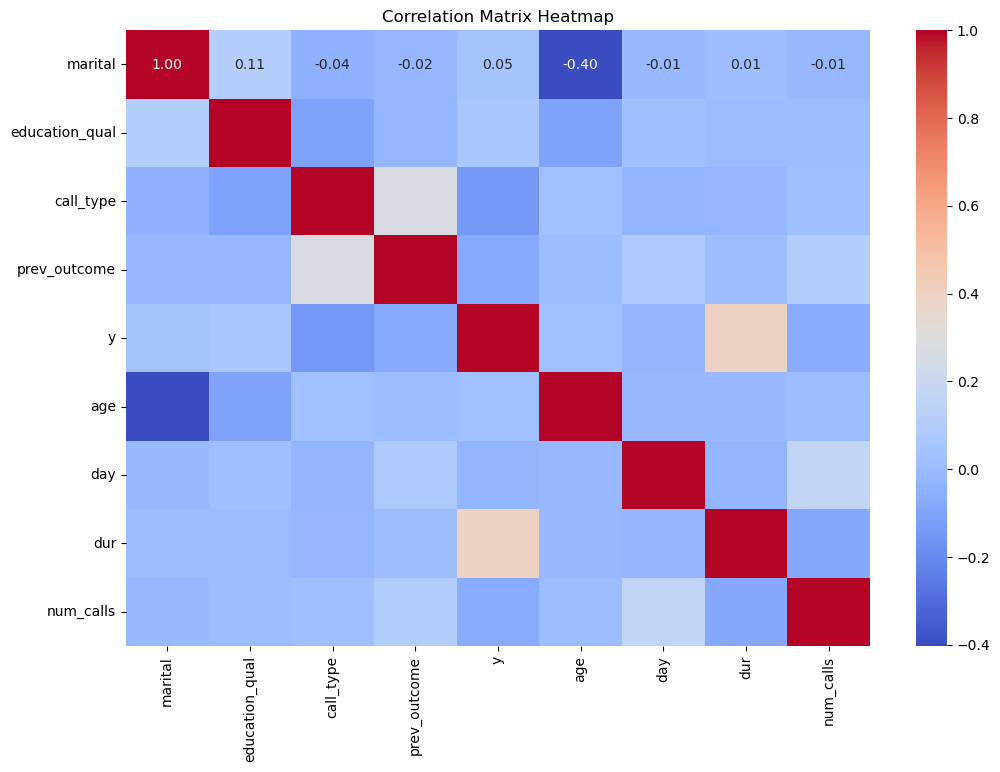

In [134]:
corr_matrix = tls_combined.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [67]:
missing_values = term_life_insurance.isnull().sum()
missing_values

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [80]:
z_score = np.abs((tls_combined - tls_combined.mean()) / tls_combined.std())

In [82]:
z_score.round()

,marital,education_qual,call_type,prev_outcome,y,age,day,dur,num_calls
0,0.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,1.0
1,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0
4,1.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
45206,0.0,1.0,1.0,0.0,3.0,1.0,0.0,3.0,0.0
45207,2.0,2.0,1.0,0.0,3.0,3.0,0.0,1.0,0.0
45208,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,1.0
45209,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0


In [83]:
outliers = z_score > 2

In [84]:
outliers.sum()

marital              0
education_qual    1857
call_type            0
prev_outcome      4901
y                 5289
age               1008
day                  0
dur               2098
num_calls         1789
dtype: int64

In [85]:
Q1 = tls_combined.quantile(0.25)
Q3 = tls_combined.quantile(0.75)
IQR = Q3 - Q1

In [86]:
IQR

marital             1.0
education_qual      1.0
call_type           2.0
prev_outcome        0.0
y                   0.0
age                15.0
day                13.0
dur               216.0
num_calls           2.0
dtype: float64

In [92]:
term_life_insurance_filtered = tls_combined[~((tls_combined < (Q1 - 1.5 * IQR)) |(tls_combined > (Q3 + 1.5 * IQR))).any(axis=1)]


In [93]:
term_life_insurance_filtered

,marital,education_qual,call_type,prev_outcome,y,age,day,dur,num_calls
0,1,2,2,3,0,58,5,261,1
1,2,1,2,3,0,44,5,151,1
2,1,1,2,3,0,33,5,76,1
3,1,3,2,3,0,47,5,92,1
4,2,3,2,3,0,33,5,198,1
...,...,...,...,...,...,...,...,...,...
45161,1,2,0,3,0,31,9,94,3
45164,1,2,0,3,0,35,9,111,2
45167,1,1,0,3,0,48,10,228,1
45198,1,2,0,3,0,37,16,333,2


In [99]:
tls_combined.describe()

,marital,education_qual,call_type,prev_outcome,y,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1.167725,1.224813,0.640242,2.559974,0.116985,40.936210,15.806419,258.163080,2.763841
std,0.608230,0.747997,0.897951,0.989059,0.321406,10.618762,8.322476,257.527812,3.098021
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,3.000000,0.000000,33.000000,8.000000,103.000000,1.000000
50%,1.000000,1.000000,0.000000,3.000000,0.000000,39.000000,16.000000,180.000000,2.000000
75%,2.000000,2.000000,2.000000,3.000000,0.000000,48.000000,21.000000,319.000000,3.000000
max,2.000000,3.000000,2.000000,3.000000,1.000000,95.000000,31.000000,4918.000000,63.000000


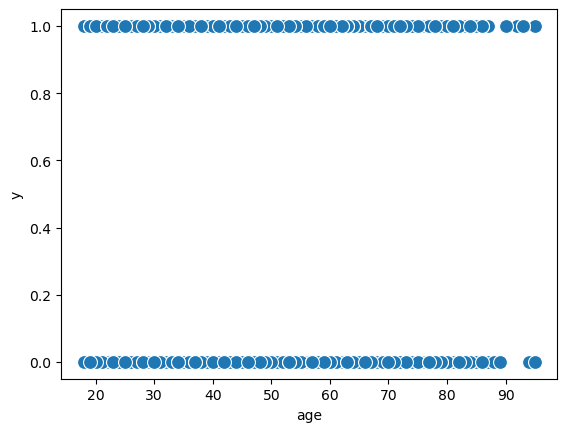

In [94]:
ax = sns.scatterplot(data = tls_combined,
                 x = 'age',
                 y= 'y',
                 s = 100)

C:\Users\Yeswanth Reddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


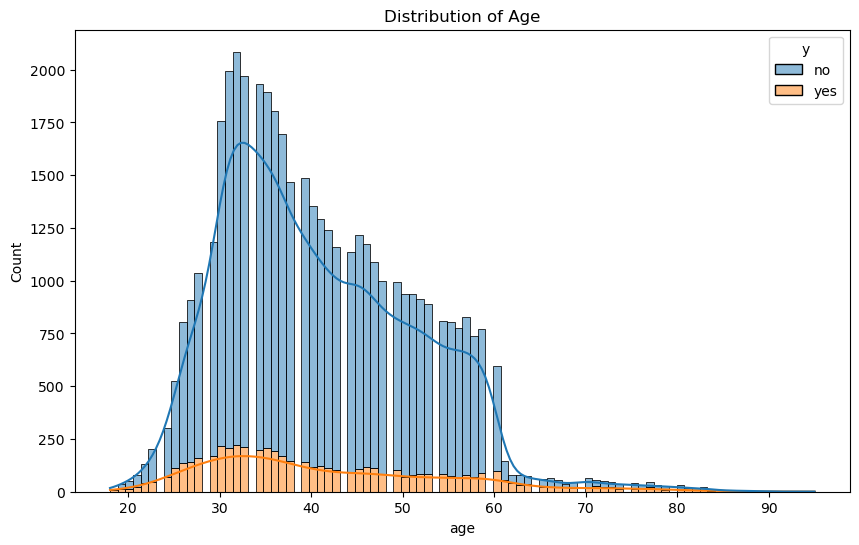

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(data=term_life_insurance, x='age', kde=True, hue=target_variable, multiple="stack")
plt.title('Distribution of Age')
plt.show()

In [ ]:
# Data Splitting

In [101]:
response ='y'
y=tls_combined[response]
predictors = list(tls_combined.columns)
predictors.remove(response)
X=tls_combined[predictors]


In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, stratify=y, random_state = 123)

In [105]:
X_train.shape

(31647, 8)

In [106]:
y_train.shape

(31647,)

In [ ]:
# Evalution

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [114]:
Regressor = LogisticRegression()
Regressor.fit(X_train,y_train)
y_pred = Regressor.predict(X_test)

C:\Users\Yeswanth Reddy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
print('LogisticRegression Classification Report:\n',classification_report(y_test,y_pred))

LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.59      0.16      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.75      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



In [126]:
Regressor.intercept_

array([-3.26950648])

In [127]:
Regressor.coef_

array([[ 0.10006835,  0.22989482, -0.57190786, -0.21181638,  0.01686918,
        -0.00523842,  0.00362609, -0.07822678]])

In [128]:
log_odds = np.round(Regressor.coef_[0],2)
log_odds

array([ 0.1 ,  0.23, -0.57, -0.21,  0.02, -0.01,  0.  , -0.08])

In [ ]:
# random Forest

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Regressor.predict(X_test))

array([[11798,   179],
       [ 1328,   259]], dtype=int64)

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [124]:
RFaccuracy = accuracy_score(y_test,y_pred)
RFaccuracy

0.9003981126511353

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.63      0.36      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [125]:
confusion_matrix(y_test,classifier.predict(X_test))

array([[11646,   331],
       [ 1020,   567]], dtype=int64)

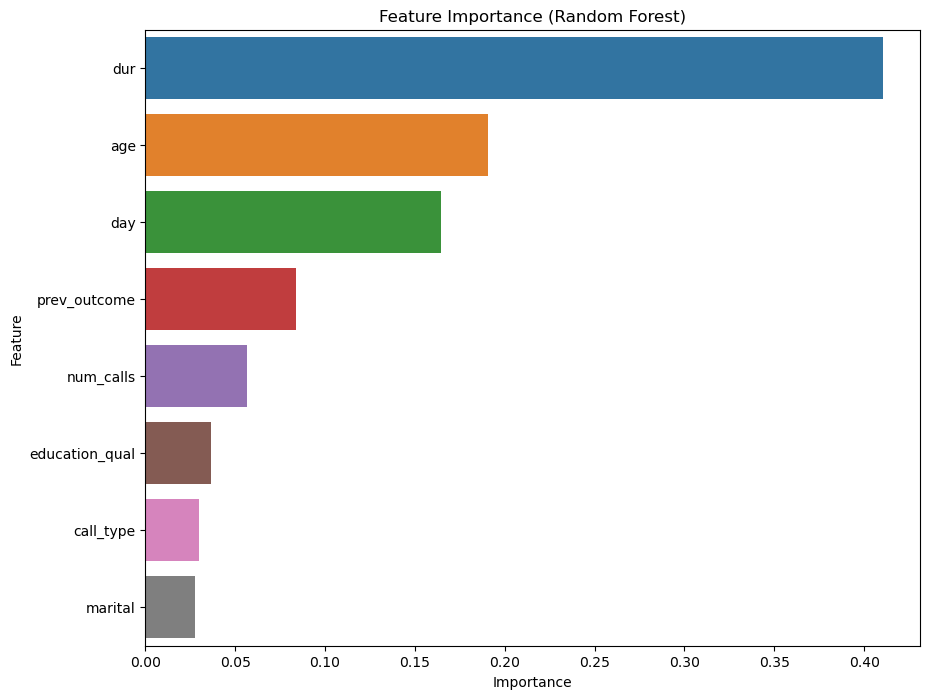

In [136]:
importances = classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()